In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import networkx as nx
from functools import partial
import geopandas as gpd
from shapely.geometry import Point, LineString
from multiprocessing import Pool
import shapely.speedups
import geopandas
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import plotly_express as px
import datetime
import plotly.graph_objects as go
import mplleaflet
sns.set()
shapely.speedups.enable()

In [2]:
df = pd.read_csv("/home1/07470/mduarte/Notebooks/ATX/04/01.csv.gz")

In [3]:
df.isna().sum()

Unnamed: 0                  0
advertiser_id               0
platform                    0
location_at                 0
latitude                    0
longitude                   0
altitude                  212
horizontal_accuracy         0
vertical_accuracy         212
heading                177765
speed                      15
ipv_4                   10566
ipv_6                  218227
final_country               0
user_agent                249
background             177879
publisher_id                0
wifi_ssid              225777
wifi_bssid             242084
tech_signals           717605
carrier                205530
device_model              758
venue_name             602216
venue_category         602256
dwell_time             656995
dtype: int64

In [4]:
df = df.drop(['Unnamed: 0', 'tech_signals', 'speed', 'ipv_4', 'ipv_6', 'wifi_ssid', 'wifi_bssid'], axis = 1)

In [5]:
nan = df

In [6]:
df = df.dropna(subset=['venue_name', 'venue_category','dwell_time'])

In [7]:
time= df['dwell_time'][df['dwell_time'] >= 14400000]

<AxesSubplot:>

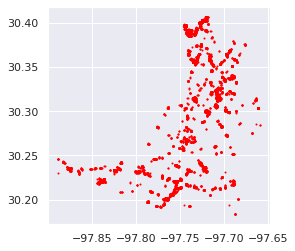

In [8]:
devicedata = gpd.GeoDataFrame(df)
devicedata['geometry'] = pd.Series(devicedata[['longitude','latitude']].values.tolist()).apply(Point)
devicedata.plot(color='red',markersize=1)

In [9]:
px.scatter_mapbox(data_frame = df,lat=df.latitude, lon=df.longitude, mapbox_style='stamen-terrain')

In [69]:
work =df.groupby(["venue_name", time])["advertiser_id"].count()
work[280:]

venue_name                          dwell_time
specs                               21522000.0     86
                                    27335000.0     58
staples                             30304000.0      1
                                    34812000.0     10
state-farm                          46034000.0     67
staybridge-suites                   36991000.0     65
subaru                              24495000.0     70
super-8                             15836000.0     43
                                    19222000.0     49
                                    45541000.0    159
target                              18589000.0     37
                                    19253000.0     17
                                    21018000.0     27
                                    23363000.0     28
                                    30754000.0     33
                                    31250000.0     29
                                    37060000.0    104
tech-net-professional-auto-service 

In [11]:
test = df.groupby(["venue_name", time])

In [12]:
nnan= nan.groupby("advertiser_id")

In [13]:
h = pd.DataFrame({ 'names':['H/jw-marriott','fedex', 'H/hilton-us', 'walmart','H/', 'state-farm', 'H/walgreens','mcdonald"s'],
                   'long':[-97.743094,-97.743413,-97.738367, -97.734716, -97.743526,-97.746211, -97.864215,-97.875756 ], 
                   'lat': [30.264505, 30.264423,30.265014, 30.355669, 30.270456, 30.255959, 30.230606, 30.235265],
                   })

In [62]:
test.get_group(('shell',31156000.0))

advertiser_id platform  location_at   latitude  \
3153    P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585767902  30.320564   
13172   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585755072  30.320694   
18199   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585754294  30.320564   
18263   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585763492  30.320564   
22887   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585748699  30.320564   
25815   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585768842  30.320565   
41806   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585749142  30.320564   
50398   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585764656  30.320564   
51188   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585757055  30.320564   
62871   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585745157  30.320564   
63837   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585743462  30.320559   
70697   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585772387  30.320565   
72400   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585769202  30.320565   
83478   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585771102  30.320559   
85715   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585756551  30.320564   
99572   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585755854  30.320565   
105617  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585758526  30.320567   
107332  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585751717  30.320570   
107382  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585746987  30.320564   
110846  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585770742  30.320559   
113771  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585753549  30.320563   
115494  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585756156  30.320593   
115786  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585751354  30.320564   
121383  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585756933  30.320564   
132304  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585763974  30.320564   
134501  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585758141  30.320567   
145805  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585760985  30.320564   
146806  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585756160  30.320593   
151321  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585741231  30.320563   
153379  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585753188  30.320563   
...                                  ...      ...          ...        ...   
466520  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585761794  30.320564   
467721  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585769562  30.320565   
480512  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585755436  30.320694   
480809  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585771648  30.320559   
486827  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585759942  30.320565   
487933  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585745170  30.320564   
494927  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585744316  30.320564   
517075  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585760662  30.320565   
528315  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585745890  30.320564   
529513  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585741574  30.320567   
537335  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585756162  30.320602   
540223  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585759126  30.320567   
571771  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585768842  30.320565   
574753  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585747922  30.320559   
586261  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585752466  30.320563   
620468  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585763252  30.320564   
627205  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585743893  30.320567   
629824  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585748325  30.320564   
637584  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585772027  30.320565   
664879  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585751349  30.320564   
669548  P6Q840R40Q0S947

In [47]:
test.get_group(('mcdonalds',27521000.0))

advertiser_id platform  location_at   latitude  \
28123   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585771362  30.235265   
30432   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585775013  30.235270   
41728   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585761428  30.235246   
47844   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585764171  30.235226   
57464   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585776889  30.235242   
83322   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585778749  30.235214   
83712   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585772909  30.235246   
84477   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585768145  30.235235   
89467   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585780588  30.235242   
100554  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585770677  30.235241   
161295  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585760246  30.235278   
161409  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585780583  30.235241   
168668  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757645  30.235286   
169448  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757372  30.235317   
170976  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585784264  30.235242   
174327  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585769301  30.235287   
206671  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757736  30.235285   
211857  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585766813  30.235214   
211923  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757963  30.235284   
224731  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585783375  30.235233   
232176  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585763240  30.235197   
254196  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757509  30.235286   
254453  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585770084  30.235233   
264180  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585782758  30.235287   
289748  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757917  30.235284   
300540  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585776202  30.235228   
314729  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757554  30.235286   
322057  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757691  30.235286   
335960  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585778136  30.235241   
339402  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585779684  30.235267   
381178  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757600  30.235286   
398634  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585784893  30.235241   
411402  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585781561  30.235238   
418400  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757781  30.235285   
451564  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585783301  30.235288   
458876  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585773813  30.235291   
469388  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585765415  30.235237   
480377  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585762628  30.235357   
490066  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585767503  30.235238   
490197  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585782139  30.235234   
490946  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585771976  30.235247   
495009  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585777510  30.235222   
504425  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585766000  30.235229   
527565  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585759610  30.235236   
548455  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585783307  30.235265   
556507  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757872  30.235284   
561203  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757417  30.235317   
590925  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585758687  30.235210   
603211  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757463  30.235278   
619700  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585774416  30.235424   
629273  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757826  30.235285   
635803  RN6N173773519Q8

In [24]:
test.get_group(('costco',30802000.0))

advertiser_id platform  location_at   latitude  \
16469   820N239N85739Q43N1061S1806706QNQ     AAID   1585724174  30.397322   
32250   820N239N85739Q43N1061S1806706QNQ     AAID   1585753271  30.396666   
38452   820N239N85739Q43N1061S1806706QNQ     AAID   1585728651  30.396815   
51797   820N239N85739Q43N1061S1806706QNQ     AAID   1585747397  30.396742   
73266   820N239N85739Q43N1061S1806706QNQ     AAID   1585731652  30.396926   
76320   820N239N85739Q43N1061S1806706QNQ     AAID   1585727138  30.396975   
80661   820N239N85739Q43N1061S1806706QNQ     AAID   1585727742  30.396846   
94889   820N239N85739Q43N1061S1806706QNQ     AAID   1585727440  30.396872   
97043   820N239N85739Q43N1061S1806706QNQ     AAID   1585730445  30.396893   
121102  820N239N85739Q43N1061S1806706QNQ     AAID   1585747785  30.396741   
125545  820N239N85739Q43N1061S1806706QNQ     AAID   1585752663  30.396602   
144379  820N239N85739Q43N1061S1806706QNQ     AAID   1585753765  30.396687   
148056  820N239N85739Q43N1061S1806706QNQ     AAID   1585742088  30.396980   
152723  820N239N85739Q43N1061S1806706QNQ     AAID   1585735226  30.397019   
154950  820N239N85739Q43N1061S1806706QNQ     AAID   1585735820  30.396995   
169212  820N239N85739Q43N1061S1806706QNQ     AAID   1585739149  30.396944   
190131  820N239N85739Q43N1061S1806706QNQ     AAID   1585736424  30.396933   
191089  820N239N85739Q43N1061S1806706QNQ     AAID   1585723873  30.396420   
206582  820N239N85739Q43N1061S1806706QNQ     AAID   1585754068  30.396480   
212144  820N239N85739Q43N1061S1806706QNQ     AAID   1585734314  30.396614   
224061  820N239N85739Q43N1061S1806706QNQ     AAID   1585745882  30.396983   
243971  820N239N85739Q43N1061S1806706QNQ     AAID   1585743299  30.396292   
248708  820N239N85739Q43N1061S1806706QNQ     AAID   1585725690  30.396845   
250294  820N239N85739Q43N1061S1806706QNQ     AAID   1585750367  30.396698   
254716  820N239N85739Q43N1061S1806706QNQ     AAID   1585746490  30.396681   
266989  820N239N85739Q43N1061S1806706QNQ     AAID   1585728349  30.396864   
272206  820N239N85739Q43N1061S1806706QNQ     AAID   1585740960  30.397221   
276291  820N239N85739Q43N1061S1806706QNQ     AAID   1585728953  30.396895   
277661  820N239N85739Q43N1061S1806706QNQ     AAID   1585740817  30.397230   
282809  820N239N85739Q43N1061S1806706QNQ     AAID   1585737331  30.396992   
...                                  ...      ...          ...        ...   
490943  820N239N85739Q43N1061S1806706QNQ     AAID   1585754675  30.396588   
491902  820N239N85739Q43N1061S1806706QNQ     AAID   1585746183  30.396891   
494265  820N239N85739Q43N1061S1806706QNQ     AAID   1585741785  30.396302   
496988  820N239N85739Q43N1061S1806706QNQ     AAID   1585725388  30.397008   
504193  820N239N85739Q43N1061S1806706QNQ     AAID   1585731350  30.396437   
507553  820N239N85739Q43N1061S1806706QNQ     AAID   1585736122  30.396903   
514878  820N239N85739Q43N1061S1806706QNQ     AAID   1585746793  30.396865   
514931  820N239N85739Q43N1061S1806706QNQ     AAID   1585732255  30.396371   
530953  820N239N85739Q43N1061S1806706QNQ     AAID   1585730747  30.396896   
569704  820N239N85739Q43N1061S1806706QNQ     AAID   1585749480  30.396703   
583962  820N239N85739Q43N1061S1806706QNQ     AAID   1585741261  30.397315   
590031  820N239N85739Q43N1061S1806706QNQ     AAID   1585743756  30.396412   
602601  820N239N85739Q43N1061S1806706QNQ     AAID   1585731049  30.396907   
606638  820N239N85739Q43N1061S1806706QNQ     AAID   1585749176  30.396475   
614374  820N239N85739Q43N1061S1806706QNQ     AAID   1585747095  30.396653   
632466  820N239N85739Q43N1061S1806706QNQ     AAID   1585751378  30.396587   
644542  820N239N85739Q43N1061S1806706QNQ     AAID   1585728048  30.396744   
660074  820N239N85739Q43N1061S1806706QNQ     AAID   1585734013  30.397015   
665017  820N239N85739Q43N1061S1806706QNQ     AAID   1585737029  30.396991   
669080  820N239N85739Q43N1061S1806706QNQ     AAID   1585729288  30.396756   
671710  820N239N85739Q4

In [15]:
test.get_group(('usps',25188000.0))

advertiser_id platform  location_at   latitude  \
44200   Q90432QR49O299093081N9QSS39O23O9     AAID   1585757416  30.277956   
59956   Q90432QR49O299093081N9QSS39O23O9     AAID   1585760736  30.278018   
61028   Q90432QR49O299093081N9QSS39O23O9     AAID   1585746855  30.277862   
78737   Q90432QR49O299093081N9QSS39O23O9     AAID   1585762885  30.277889   
83267   Q90432QR49O299093081N9QSS39O23O9     AAID   1585768679  30.277762   
113704  Q90432QR49O299093081N9QSS39O23O9     AAID   1585762880  30.277876   
127458  Q90432QR49O299093081N9QSS39O23O9     AAID   1585770198  30.278181   
134059  Q90432QR49O299093081N9QSS39O23O9     AAID   1585761317  30.277936   
151708  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746764  30.278026   
155115  Q90432QR49O299093081N9QSS39O23O9     AAID   1585754497  30.277667   
157984  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746706  30.278247   
168334  Q90432QR49O299093081N9QSS39O23O9     AAID   1585751270  30.278026   
260166  Q90432QR49O299093081N9QSS39O23O9     AAID   1585752440  30.277935   
275031  Q90432QR49O299093081N9QSS39O23O9     AAID   1585750668  30.277943   
286147  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746945  30.277868   
287488  Q90432QR49O299093081N9QSS39O23O9     AAID   1585749334  30.277964   
318890  Q90432QR49O299093081N9QSS39O23O9     AAID   1585769880  30.277847   
322545  Q90432QR49O299093081N9QSS39O23O9     AAID   1585766839  30.277923   
348599  Q90432QR49O299093081N9QSS39O23O9     AAID   1585765638  30.278026   
376635  Q90432QR49O299093081N9QSS39O23O9     AAID   1585765016  30.277901   
381325  Q90432QR49O299093081N9QSS39O23O9     AAID   1585771362  30.277872   
389146  Q90432QR49O299093081N9QSS39O23O9     AAID   1585758609  30.278011   
396829  Q90432QR49O299093081N9QSS39O23O9     AAID   1585760135  30.277816   
397746  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746661  30.278530   
424966  Q90432QR49O299093081N9QSS39O23O9     AAID   1585759552  30.277936   
436609  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746900  30.277908   
439560  Q90432QR49O299093081N9QSS39O23O9     AAID   1585761964  30.277853   
454340  Q90432QR49O299093081N9QSS39O23O9     AAID   1585755184  30.277959   
466616  Q90432QR49O299093081N9QSS39O23O9     AAID   1585769259  30.277909   
474897  Q90432QR49O299093081N9QSS39O23O9     AAID   1585755848  30.277983   
487474  Q90432QR49O299093081N9QSS39O23O9     AAID   1585764145  30.278033   
513812  Q90432QR49O299093081N9QSS39O23O9     AAID   1585747031  30.277934   
513837  Q90432QR49O299093081N9QSS39O23O9     AAID   1585748590  30.277901   
516046  Q90432QR49O299093081N9QSS39O23O9     AAID   1585750072  30.277905   
521808  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746810  30.278306   
525256  Q90432QR49O299093081N9QSS39O23O9     AAID   1585766224  30.277957   
548591  Q90432QR49O299093081N9QSS39O23O9     AAID   1585767457  30.277918   
555924  Q90432QR49O299093081N9QSS39O23O9     AAID   1585770772  30.277808   
566588  Q90432QR49O299093081N9QSS39O23O9     AAID   1585753734  30.277842   
605202  Q90432QR49O299093081N9QSS39O23O9     AAID   1585756802  30.277859   
613659  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746993  30.277949   
664606  Q90432QR49O299093081N9QSS39O23O9     AAID   1585763552  30.277912   
668991  Q90432QR49O299093081N9QSS39O23O9     AAID   1585751860  30.277945   
690689  Q90432QR49O299093081N9QSS39O23O9     AAID   1585753057  30.277886   
701568  Q90432QR49O299093081N9QSS39O23O9     AAID   1585768052  30.277667   
722045  Q90432QR49O299093081N9QSS39O23O9     AAID   1585771849  30.278451   
729262  Q90432QR49O299093081N9QSS39O23O9     AAID   1585761319  30.277940   
734379  Q90432QR49O299093081N9QSS39O23O9     AAID   1585768058  30.277826   

        longitude    altitude  horizontal_accuracy  vertical_accuracy  \
44200  -97.737968  143.700012                 30.4                0.0   
59956  -97.737669  150.200012                 17.9                0.0   
61028  -97.737653  143.700012     

In [16]:
test.get_group(('usps',19651000.0))

advertiser_id platform  location_at   latitude  \
18301   294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585779121  30.213739   
25235   294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585767680  30.213739   
83969   294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585770199  30.213829   
87683   294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760429  30.214001   
126397  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585763237  30.213739   
135567  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760384  30.214123   
210881  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585775041  30.213739   
241975  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585761600  30.213739   
242007  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585762261  30.213739   
272102  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585775647  30.213739   
295774  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585767072  30.213739   
323320  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585763867  30.213739   
337584  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585777250  30.213739   
359400  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760807  30.213739   
391734  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760630  30.213735   
396347  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585778505  30.213739   
400471  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585765006  30.213739   
407594  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585766361  30.213739   
416031  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585773117  30.213739   
421113  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585774260  30.213739   
435080  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585769583  30.213739   
455016  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760826  30.213739   
467411  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585772522  30.213739   
480477  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585767073  30.213739   
511566  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585777874  30.213871   
533579  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585779814  30.213739   
539944  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585763322  30.213739   
540796  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760723  30.213738   
583987  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585763166  30.213739   
586062  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585763864  30.213739   
595913  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585776553  30.213739   
612135  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585770892  30.213739   
617434  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585768539  30.213739   
621540  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585780035  30.214352   
628523  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585771538  30.213739   
648812  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760922  30.213779   
649272  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585765683  30.213793   
657368  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760877  30.213791   
663650  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585770190  30.213871   
677906  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760675  30.213737   
718564  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760583  30.213739   
722358  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760474  30.213910   
728517  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760519  30.213857   

        longitude    altitude  horizontal_accuracy  vertical_accuracy  \
18301  -97.732388  166.200012                 16.0                0.0   
25235  -97.732388  166.200012                 16.0                0.0   
83969  -97.732527  166.200012                 43.5                0.0   
87683  -97.731796  166.900009                  3.8                0.0   
126397 -97.732388  166.200012                 16.0                0.0   
135567 -97.731926  164.072388                  3.8                0.0   
210881 -97.732388  166.200012                 16.0                0.0   
241975 -97.732388  166.100006                 16.0    

In [18]:
nnan.get_group("Q90432QR49O299093081N9QSS39O23O9")

advertiser_id platform  location_at   latitude  \
16343   Q90432QR49O299093081N9QSS39O23O9     AAID   1585774847  30.319278   
36531   Q90432QR49O299093081N9QSS39O23O9     AAID   1585774249  30.319343   
44200   Q90432QR49O299093081N9QSS39O23O9     AAID   1585757416  30.277956   
59956   Q90432QR49O299093081N9QSS39O23O9     AAID   1585760736  30.278018   
61028   Q90432QR49O299093081N9QSS39O23O9     AAID   1585746855  30.277862   
78737   Q90432QR49O299093081N9QSS39O23O9     AAID   1585762885  30.277889   
83267   Q90432QR49O299093081N9QSS39O23O9     AAID   1585768679  30.277762   
113704  Q90432QR49O299093081N9QSS39O23O9     AAID   1585762880  30.277876   
127458  Q90432QR49O299093081N9QSS39O23O9     AAID   1585770198  30.278181   
134059  Q90432QR49O299093081N9QSS39O23O9     AAID   1585761317  30.277936   
151708  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746764  30.278026   
155115  Q90432QR49O299093081N9QSS39O23O9     AAID   1585754497  30.277667   
157984  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746706  30.278247   
168334  Q90432QR49O299093081N9QSS39O23O9     AAID   1585751270  30.278026   
197639  Q90432QR49O299093081N9QSS39O23O9     AAID   1585774245  30.319338   
260166  Q90432QR49O299093081N9QSS39O23O9     AAID   1585752440  30.277935   
275031  Q90432QR49O299093081N9QSS39O23O9     AAID   1585750668  30.277943   
286147  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746945  30.277868   
287488  Q90432QR49O299093081N9QSS39O23O9     AAID   1585749334  30.277964   
318890  Q90432QR49O299093081N9QSS39O23O9     AAID   1585769880  30.277847   
322545  Q90432QR49O299093081N9QSS39O23O9     AAID   1585766839  30.277923   
348599  Q90432QR49O299093081N9QSS39O23O9     AAID   1585765638  30.278026   
360291  Q90432QR49O299093081N9QSS39O23O9     AAID   1585774239  30.319573   
376635  Q90432QR49O299093081N9QSS39O23O9     AAID   1585765016  30.277901   
381325  Q90432QR49O299093081N9QSS39O23O9     AAID   1585771362  30.277872   
389146  Q90432QR49O299093081N9QSS39O23O9     AAID   1585758609  30.278011   
396829  Q90432QR49O299093081N9QSS39O23O9     AAID   1585760135  30.277816   
397746  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746661  30.278530   
416934  Q90432QR49O299093081N9QSS39O23O9     AAID   1585774484  30.319226   
424966  Q90432QR49O299093081N9QSS39O23O9     AAID   1585759552  30.277936   
436609  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746900  30.277908   
439560  Q90432QR49O299093081N9QSS39O23O9     AAID   1585761964  30.277853   
454340  Q90432QR49O299093081N9QSS39O23O9     AAID   1585755184  30.277959   
466616  Q90432QR49O299093081N9QSS39O23O9     AAID   1585769259  30.277909   
474897  Q90432QR49O299093081N9QSS39O23O9     AAID   1585755848  30.277983   
487474  Q90432QR49O299093081N9QSS39O23O9     AAID   1585764145  30.278033   
513812  Q90432QR49O299093081N9QSS39O23O9     AAID   1585747031  30.277934   
513837  Q90432QR49O299093081N9QSS39O23O9     AAID   1585748590  30.277901   
516046  Q90432QR49O299093081N9QSS39O23O9     AAID   1585750072  30.277905   
521808  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746810  30.278306   
525256  Q90432QR49O299093081N9QSS39O23O9     AAID   1585766224  30.277957   
548591  Q90432QR49O299093081N9QSS39O23O9     AAID   1585767457  30.277918   
555924  Q90432QR49O299093081N9QSS39O23O9     AAID   1585770772  30.277808   
566588  Q90432QR49O299093081N9QSS39O23O9     AAID   1585753734  30.277842   
583097  Q90432QR49O299093081N9QSS39O23O9     AAID   1585773899  30.320100   
605202  Q90432QR49O299093081N9QSS39O23O9     AAID   1585756802  30.277859   
613659  Q90432QR49O299093081N9QSS39O23O9     AAID   1585746993  30.277949   
664606  Q90432QR49O299093081N9QSS39O23O9     AAID   1585763552  30.277912   
668991  Q90432QR49O299093081N9QSS39O23O9     AAID   1585751860  30.277945   
690689  Q90432QR49O299093081N9QSS39O23O9     AAID   1585753057  30.277886   
701568  Q90432QR49O299093081N9QSS39O23O9     AAID   1585768052  30.277667   
722045  Q90432QR49O2990

In [19]:
nnan.get_group("294Q76R2Q60593P1O107O8O56OS6NQ46")

advertiser_id platform  location_at   latitude  \
18301   294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585779121  30.213739   
25235   294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585767680  30.213739   
51306   294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585746477  30.213428   
58144   294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585746839  30.213432   
61702   294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585705126  30.192687   
83969   294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585770199  30.213829   
87683   294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760429  30.214001   
126397  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585763237  30.213739   
135567  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760384  30.214123   
153904  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585755337  30.213739   
210881  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585775041  30.213739   
226843  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585755338  30.213739   
241975  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585761600  30.213739   
242007  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585762261  30.213739   
247377  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585746433  30.213428   
272102  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585775647  30.213739   
275393  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585746749  30.213416   
289846  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585746253  30.214478   
292895  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585747447  30.213739   
295333  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585746794  30.213411   
295774  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585767072  30.213739   
323320  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585763867  30.213739   
337584  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585777250  30.213739   
343815  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585746659  30.213414   
356523  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585746524  30.213428   
359400  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760807  30.213739   
379897  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585746298  30.214575   
385121  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585754482  30.213739   
391734  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760630  30.213735   
392107  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585746704  30.213414   
...                                  ...      ...          ...        ...   
478788  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585751581  30.213739   
480477  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585767073  30.213739   
483836  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585746208  30.214434   
511566  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585777874  30.213871   
531017  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585749594  30.213739   
533124  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585755926  30.213739   
533579  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585779814  30.213739   
538151  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585746614  30.213401   
539944  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585763322  30.213739   
540796  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760723  30.213738   
583987  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585763166  30.213739   
586062  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585763864  30.213739   
595913  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585776553  30.213739   
597336  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585756514  30.213739   
612135  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585770892  30.213739   
617434  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585768539  30.213739   
621540  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585780035  30.214352   
628523  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585771538  30.213739   
648812  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585760922  30.213779   
649272  294Q76R2Q60593P1O107O8O56OS6NQ46     AAID   1585765683  30.213793   
657368  294Q76R2Q60593P

In [25]:
nnan.get_group("820N239N85739Q43N1061S1806706QNQ")

advertiser_id platform  location_at   latitude  \
16469   820N239N85739Q43N1061S1806706QNQ     AAID   1585724174  30.397322   
32250   820N239N85739Q43N1061S1806706QNQ     AAID   1585753271  30.396666   
35900   820N239N85739Q43N1061S1806706QNQ     AAID   1585734924  30.398651   
38452   820N239N85739Q43N1061S1806706QNQ     AAID   1585728651  30.396815   
51797   820N239N85739Q43N1061S1806706QNQ     AAID   1585747397  30.396742   
73266   820N239N85739Q43N1061S1806706QNQ     AAID   1585731652  30.396926   
76320   820N239N85739Q43N1061S1806706QNQ     AAID   1585727138  30.396975   
80661   820N239N85739Q43N1061S1806706QNQ     AAID   1585727742  30.396846   
94889   820N239N85739Q43N1061S1806706QNQ     AAID   1585727440  30.396872   
97043   820N239N85739Q43N1061S1806706QNQ     AAID   1585730445  30.396893   
121102  820N239N85739Q43N1061S1806706QNQ     AAID   1585747785  30.396741   
125545  820N239N85739Q43N1061S1806706QNQ     AAID   1585752663  30.396602   
144379  820N239N85739Q43N1061S1806706QNQ     AAID   1585753765  30.396687   
148056  820N239N85739Q43N1061S1806706QNQ     AAID   1585742088  30.396980   
152723  820N239N85739Q43N1061S1806706QNQ     AAID   1585735226  30.397019   
154950  820N239N85739Q43N1061S1806706QNQ     AAID   1585735820  30.396995   
169212  820N239N85739Q43N1061S1806706QNQ     AAID   1585739149  30.396944   
190131  820N239N85739Q43N1061S1806706QNQ     AAID   1585736424  30.396933   
191089  820N239N85739Q43N1061S1806706QNQ     AAID   1585723873  30.396420   
206582  820N239N85739Q43N1061S1806706QNQ     AAID   1585754068  30.396480   
212144  820N239N85739Q43N1061S1806706QNQ     AAID   1585734314  30.396614   
224061  820N239N85739Q43N1061S1806706QNQ     AAID   1585745882  30.396983   
243109  820N239N85739Q43N1061S1806706QNQ     AAID   1585742997  30.398651   
243971  820N239N85739Q43N1061S1806706QNQ     AAID   1585743299  30.396292   
248708  820N239N85739Q43N1061S1806706QNQ     AAID   1585725690  30.396845   
250294  820N239N85739Q43N1061S1806706QNQ     AAID   1585750367  30.396698   
254716  820N239N85739Q43N1061S1806706QNQ     AAID   1585746490  30.396681   
266989  820N239N85739Q43N1061S1806706QNQ     AAID   1585728349  30.396864   
272206  820N239N85739Q43N1061S1806706QNQ     AAID   1585740960  30.397221   
276291  820N239N85739Q43N1061S1806706QNQ     AAID   1585728953  30.396895   
...                                  ...      ...          ...        ...   
491902  820N239N85739Q43N1061S1806706QNQ     AAID   1585746183  30.396891   
494265  820N239N85739Q43N1061S1806706QNQ     AAID   1585741785  30.396302   
496988  820N239N85739Q43N1061S1806706QNQ     AAID   1585725388  30.397008   
504193  820N239N85739Q43N1061S1806706QNQ     AAID   1585731350  30.396437   
507553  820N239N85739Q43N1061S1806706QNQ     AAID   1585736122  30.396903   
514878  820N239N85739Q43N1061S1806706QNQ     AAID   1585746793  30.396865   
514931  820N239N85739Q43N1061S1806706QNQ     AAID   1585732255  30.396371   
524236  820N239N85739Q43N1061S1806706QNQ     AAID   1585742396  30.394968   
530953  820N239N85739Q43N1061S1806706QNQ     AAID   1585730747  30.396896   
569704  820N239N85739Q43N1061S1806706QNQ     AAID   1585749480  30.396703   
583962  820N239N85739Q43N1061S1806706QNQ     AAID   1585741261  30.397315   
590031  820N239N85739Q43N1061S1806706QNQ     AAID   1585743756  30.396412   
602601  820N239N85739Q43N1061S1806706QNQ     AAID   1585731049  30.396907   
606638  820N239N85739Q43N1061S1806706QNQ     AAID   1585749176  30.396475   
614374  820N239N85739Q43N1061S1806706QNQ     AAID   1585747095  30.396653   
632466  820N239N85739Q43N1061S1806706QNQ     AAID   1585751378  30.396587   
644542  820N239N85739Q43N1061S1806706QNQ     AAID   1585728048  30.396744   
660074  820N239N85739Q43N1061S1806706QNQ     AAID   1585734013  30.397015   
665017  820N239N85739Q43N1061S1806706QNQ     AAID   1585737029  30.396991   
669080  820N239N85739Q43N1061S1806706QNQ     AAID   1585729288  30.396756   
671710  820N239N85739Q4

In [48]:
nnan.get_group("RN6N173773519Q81303R7S21024Q6N3P")

advertiser_id platform  location_at   latitude  \
28123   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585771362  30.235265   
30432   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585775013  30.235270   
41728   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585761428  30.235246   
47844   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585764171  30.235226   
57464   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585776889  30.235242   
82638   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585756862  30.230565   
83322   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585778749  30.235214   
83712   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585772909  30.235246   
84477   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585768145  30.235235   
89467   RN6N173773519Q81303R7S21024Q6N3P     AAID   1585780588  30.235242   
100554  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585770677  30.235241   
158830  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757054  30.230606   
161295  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585760246  30.235278   
161409  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585780583  30.235241   
168668  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757645  30.235286   
169448  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757372  30.235317   
170976  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585784264  30.235242   
174327  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585769301  30.235287   
206671  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757736  30.235285   
211857  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585766813  30.235214   
211923  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757963  30.235284   
224731  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585783375  30.235233   
232176  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585763240  30.235197   
254196  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757509  30.235286   
254453  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585770084  30.235233   
256598  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757098  30.230608   
264180  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585782758  30.235287   
289748  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757917  30.235284   
300540  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585776202  30.235228   
314729  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757554  30.235286   
...                                  ...      ...          ...        ...   
335960  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585778136  30.235241   
339402  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585779684  30.235267   
347863  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585702890  30.208195   
381178  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757600  30.235286   
398634  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585784893  30.235241   
411402  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585781561  30.235238   
418400  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757781  30.235285   
433287  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585700925  30.208252   
443622  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585756907  30.230601   
451564  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585783301  30.235288   
458876  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585773813  30.235291   
469388  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585765415  30.235237   
480377  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585762628  30.235357   
490066  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585767503  30.235238   
490197  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585782139  30.235234   
490946  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585771976  30.235247   
495009  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585777510  30.235222   
504425  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585766000  30.235229   
505800  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585757143  30.230597   
527565  RN6N173773519Q81303R7S21024Q6N3P     AAID   1585759610  30.235236   
548455  RN6N173773519Q8

In [63]:
nnan.get_group("P6Q840R40Q0S947530SSOQ76SQ7NSO4Q")

advertiser_id platform  location_at   latitude  \
3153    P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585767902  30.320564   
13172   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585755072  30.320694   
18199   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585754294  30.320564   
18263   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585763492  30.320564   
19152   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585777921  30.391821   
22887   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585748699  30.320564   
25815   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585768842  30.320565   
40356   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585773614  30.347677   
41806   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585749142  30.320564   
50398   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585764656  30.320564   
51188   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585757055  30.320564   
62871   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585745157  30.320564   
63837   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585743462  30.320559   
70697   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585772387  30.320565   
72054   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585776850  30.363050   
72400   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585769202  30.320565   
83478   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585771102  30.320559   
85715   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585756551  30.320564   
90066   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585780813  30.324260   
99572   P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585755854  30.320565   
105617  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585758526  30.320567   
107332  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585751717  30.320570   
107382  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585746987  30.320564   
110846  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585770742  30.320559   
113771  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585753549  30.320563   
115494  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585756156  30.320593   
115786  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585751354  30.320564   
117375  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585778650  30.392050   
121383  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585756933  30.320564   
132304  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585763974  30.320564   
...                                  ...      ...          ...        ...   
487933  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585745170  30.320564   
494927  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585744316  30.320564   
516216  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585779770  30.391094   
517075  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585760662  30.320565   
528195  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585779527  30.391778   
528315  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585745890  30.320564   
529513  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585741574  30.320567   
537335  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585756162  30.320602   
540223  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585759126  30.320567   
540489  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585780503  30.320727   
571771  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585768842  30.320565   
574753  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585747922  30.320559   
583657  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585780136  30.370261   
586261  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585752466  30.320563   
620468  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585763252  30.320564   
627205  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585743893  30.320567   
629824  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585748325  30.320564   
637584  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585772027  30.320565   
664879  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585751349  30.320564   
666075  P6Q840R40Q0S947530SSOQ76SQ7NSO4Q     AAID   1585777583  30.391764   
669548  P6Q840R40Q0S947

In [66]:
timestamp = datetime.datetime.fromtimestamp(1585776850)
print(timestamp.strftime('%Y-%m-%d %H:%M:%S'))

2020-04-01 16:34:10
